In [1]:
import matplotlib.pyplot as plt
from birdclef import Dataset, SummaryStatistics

In [11]:
dataset = Dataset.load(Dataset.PATH)
summary = SummaryStatistics(dataset)

In [13]:
summary.num_samples()

16941

In [42]:
label_counts = summary.label_counts()
labels = list(label_counts.keys())
counts = [label_counts[label] for label in labels]

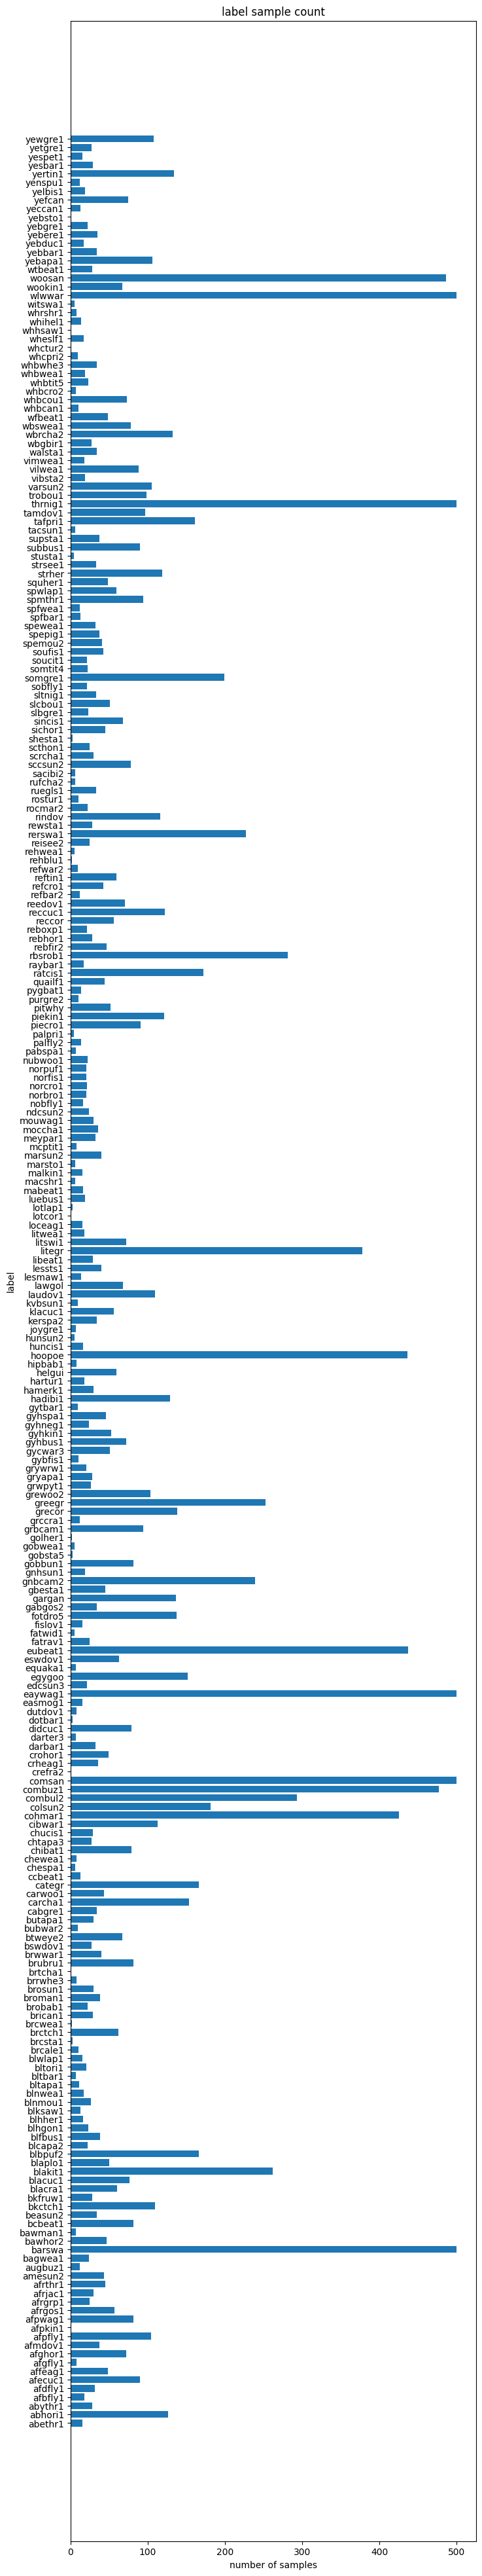

In [43]:
fig, ax = plt.subplots(figsize=(8, 50))
ax.barh(labels, counts)

ax.set_title("label sample count")
ax.set_xlabel("number of samples")
ax.set_ylabel("label")

plt.show()

In [44]:
audio_sample_counts = summary.audio_sample_counts()

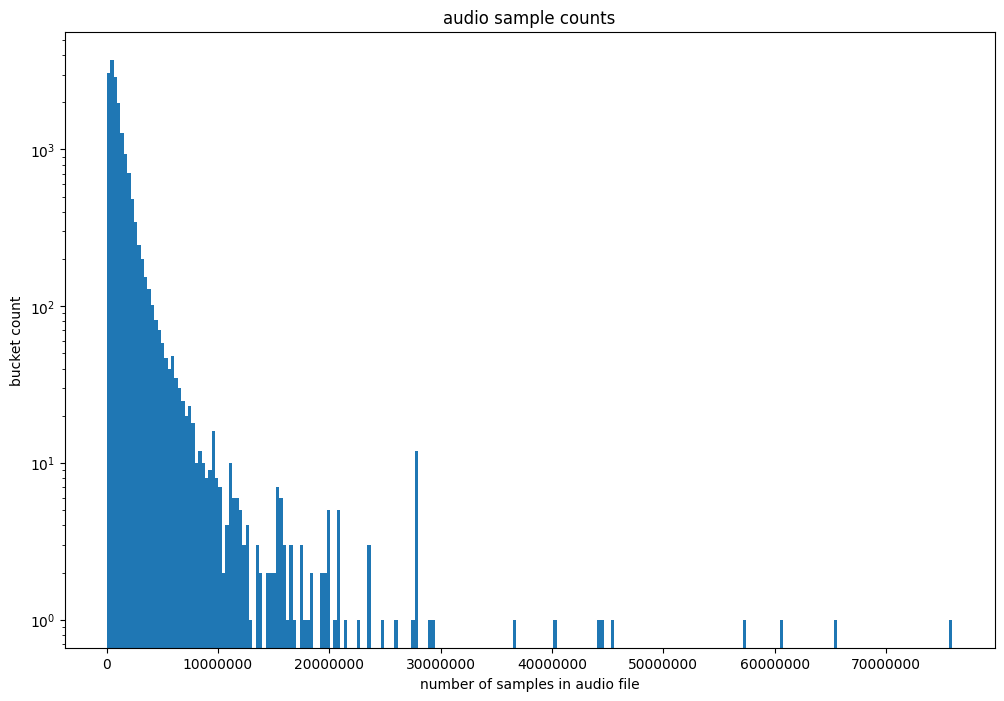

In [76]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(audio_sample_counts, bins=250, log=True)

ax.set_title("audio sample counts")
ax.set_xlabel("number of samples in audio file")
ax.set_ylabel("bucket count")
ax.ticklabel_format(style="plain", useOffset=False, axis="x") 

plt.show()

In [70]:
random = dataset.pick_random()

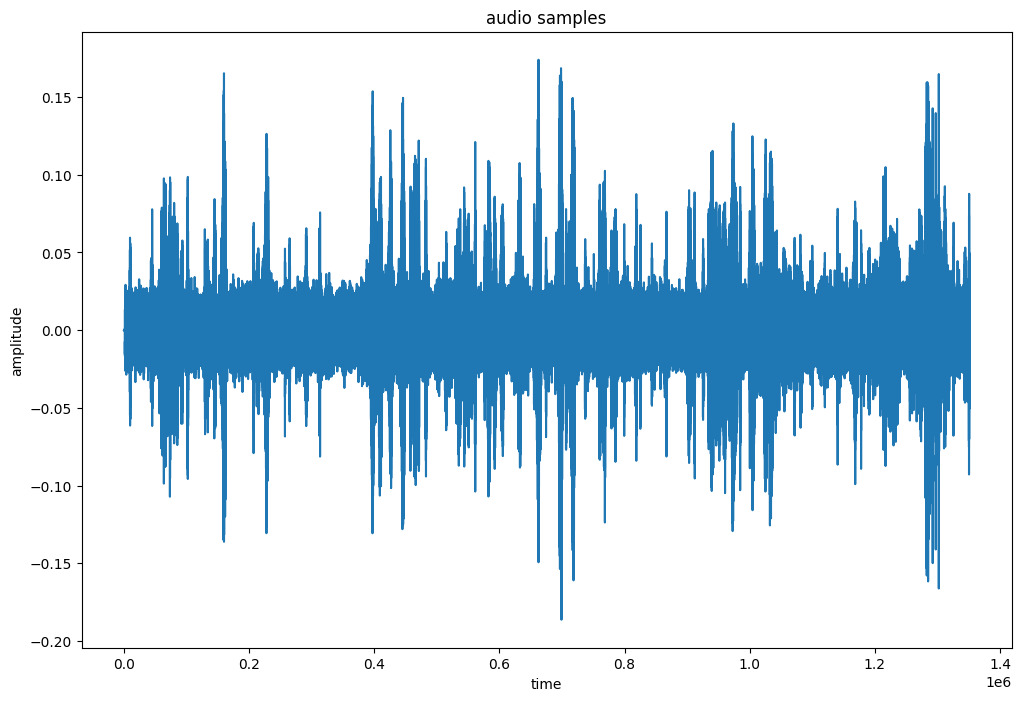

In [72]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(random.audio_samples(Dataset.SAMPLE_RATE))

ax.set_title("audio samples")
ax.set_xlabel("time")
ax.set_ylabel("amplitude")

plt.show()

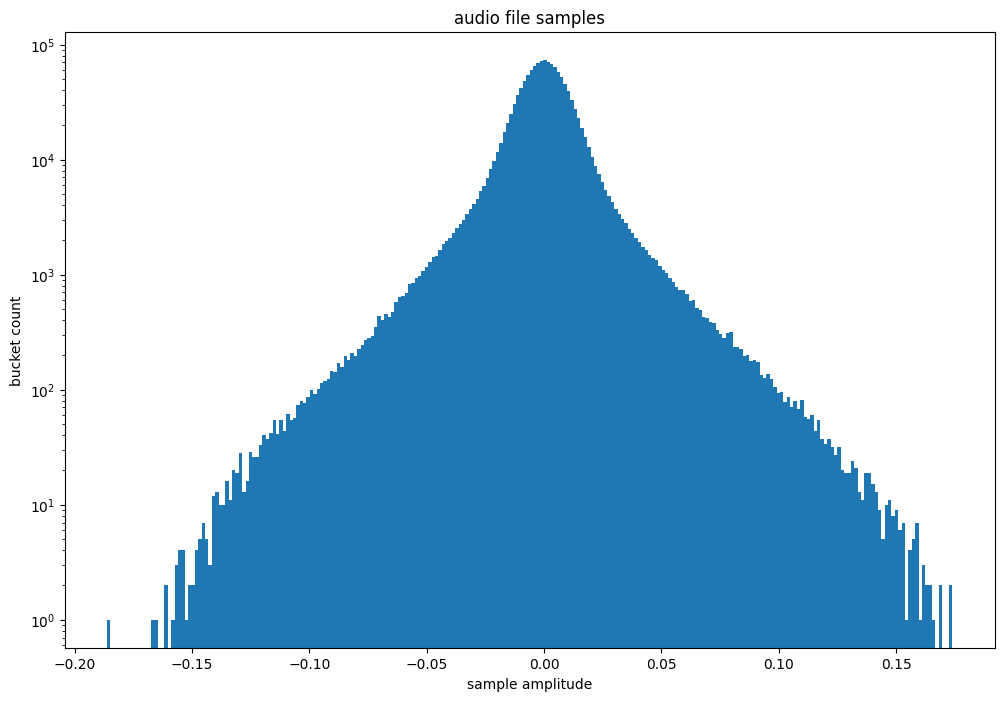

In [79]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(random.audio_samples(Dataset.SAMPLE_RATE), bins=250, log=True)

ax.set_title("audio file samples")
ax.set_xlabel("sample amplitude")
ax.set_ylabel("bucket count")

plt.show()